In [3]:
import lightkurve as lk
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Lets test using some LightKurve functionality alongside the pandas library.
- I will create a pandas data frame using a csv file obtained from AstroimageJ 
- Despite some potential issues in data from the 

In [4]:
#pandas dataframes can be thought of as a 2d array/microsoft excel equivalent, the head method returns the first few rows of a dataframe.
df = pd.read_csv('/Users/spencerfreeman/Desktop/stepUp/lightkurve_datasets/hat-p-23b.csv')
df.describe()

,Saturated,JD_SOBS,JD_UTC,HJD_UTC,BJD_TDB,AIRMASS,ALT_OBJ,CCD-TEMP,EXPTIME,RAOBJ2K,...,N_Sky_Pixels_C4,N_Sky_Pixels_C5,N_Sky_Pixels_C6,N_Sky_Pixels_C7,N_Sky_Pixels_C8,N_Sky_Pixels_C9,N_Sky_Pixels_C10,N_Sky_Pixels_C11,N_Sky_Pixels_C12,N_Sky_Pixels_C13
count,79.0,7.900000e+01,7.900000e+01,7.900000e+01,7.900000e+01,79.000000,79.000000,79.000000,79.0,79.0,...,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,0.0,2.460501e+06,2.460501e+06,2.460501e+06,2.460501e+06,1.049478,75.897372,-19.952532,120.0,0.0,...,528.962025,548.873418,541.151899,535.898734,510.063291,554.063291,547.594937,540.949367,554.835443,538.822785
std,0.0,3.535630e-02,3.535630e-02,3.535960e-02,3.535961e-02,0.057228,10.017268,0.016491,0.0,0.0,...,20.143996,22.732202,22.963231,20.752877,21.578326,19.628173,20.950197,21.667593,20.220851,21.926310
min,0.0,2.460501e+06,2.460501e+06,2.460501e+06,2.460501e+06,1.000003,56.629444,-19.968750,120.0,0.0,...,451.000000,479.000000,471.000000,452.000000,464.000000,495.000000,481.000000,487.000000,499.000000,484.000000
25%,0.0,2.460501e+06,2.460501e+06,2.460501e+06,2.460501e+06,1.004708,67.460922,-19.968750,120.0,0.0,...,519.500000,535.000000,528.000000,524.000000,496.000000,539.000000,537.000000,526.500000,542.000000,524.000000
50%,0.0,2.460501e+06,2.460501e+06,2.460501e+06,2.460501e+06,1.021183,78.292474,-19.937500,120.0,0.0,...,531.000000,554.000000,543.000000,538.000000,507.000000,556.000000,550.000000,540.000000,555.000000,537.000000
75%,0.0,2.460501e+06,2.460501e+06,2.460501e+06,2.460501e+06,1.082456,84.443288,-19.937500,120.0,0.0,...,541.500000,563.500000,561.000000,551.000000,523.000000,568.000000,561.500000,557.000000,569.500000,557.000000
max,0.0,2.460501e+06,2.460501e+06,2.460501e+06,2.460501e+06,1.196720,89.857112,-19.906250,120.0,0.0,...,570.000000,590.000000,587.000000,580.000000,558.000000,595.000000,587.000000,599.000000,600.000000,584.000000


In [5]:
df.loc[:, ["JD_UTC", "rel_flux_T1"]]

,JD_UTC,rel_flux_T1
0,2.460501e+06,0.087978
1,2.460501e+06,0.088718
2,2.460501e+06,0.090346
3,2.460501e+06,0.087947
4,2.460501e+06,0.089358
...,...,...
74,2.460501e+06,0.088300
75,2.460501e+06,0.088565
76,2.460501e+06,0.088738
77,2.460501e+06,0.088584


Text(0, 0.5, 'Relative Flux (normalized)')

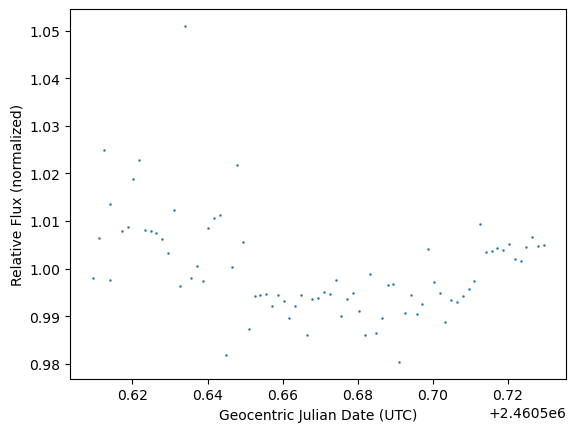

In [6]:
rel_flux_T1 = df.loc[:, "rel_flux_T1"]
jd_utc = df.loc[:, "JD_UTC"]

#define a figure/axis from the matplotlib library
fig, ax = plt.subplots()

#for the time being, we normalize to the mean value of rel_flux_T1
mean=rel_flux_T1.mean()
ax.scatter(jd_utc,rel_flux_T1/mean, s=0.6)
ax.set_xlabel("Geocentric Julian Date (UTC)")
ax.set_ylabel("Relative Flux (normalized)")
ax.set_title("Hat-P-23b")

now we will add some labels